something here


## Reproducing plots from Project Description

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# for 1000 Monte Carlo steps, lattice side length 20, reduced T = 0.65
# data structure is [MCsteps, Ratio, Energy, Order]
baseline_data = np.loadtxt('LL-Outputs/LL-Output-Baseline.txt')
MCsteps = baseline_data[:,0]

In [85]:
baseline_data

array([[ 0.0000000e+00,  5.0000000e-01, -3.9883320e+02,  2.6850000e-01],
       [ 1.0000000e+00,  7.0500000e-01, -6.0241640e+02,  3.3070000e-01],
       [ 2.0000000e+00,  5.9500000e-01, -7.4387570e+02,  3.0760000e-01],
       ...,
       [ 9.9800000e+02,  4.2250000e-01, -1.2593601e+03,  7.5380000e-01],
       [ 9.9900000e+02,  3.8000000e-01, -1.2492319e+03,  7.5320000e-01],
       [ 1.0000000e+03,  4.3750000e-01, -1.2789787e+03,  7.5680000e-01]])

Monte Carlo step versus reduced energy, and Monte Carlo steps versus Order S for reduced T = 0.65

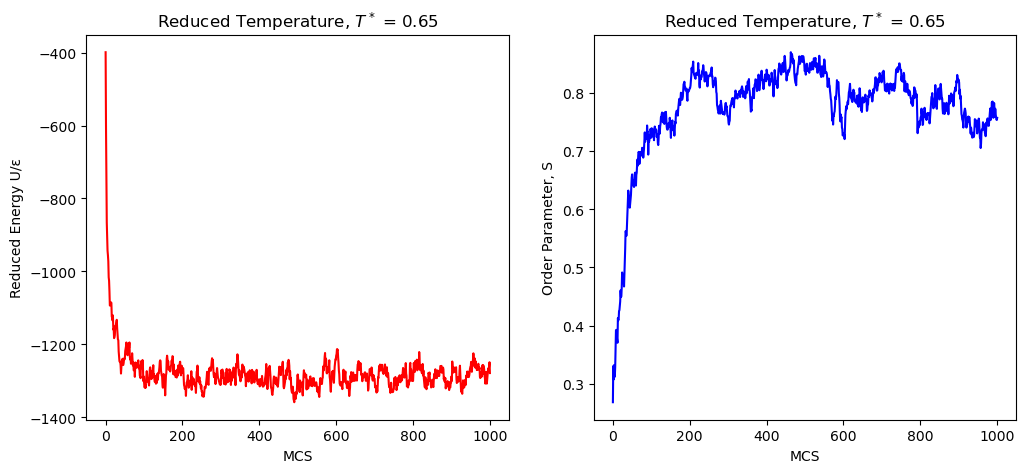

In [88]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(baseline_data[:,0], baseline_data[:,2], color='red')

ax[0].set_xlabel('MCS')
ax[0].set_ylabel('Reduced Energy U/ε')
ax[0].set_title('Reduced Temperature, $T^*$ = 0.65')

ax[1].plot(baseline_data[:,0], baseline_data[:,3], color='blue')

ax[1].set_xlabel('MCS')
ax[1].set_ylabel('Order Parameter, S')
ax[1].set_title('Reduced Temperature, $T^*$ = 0.65')
plt.show()

In [89]:
reduced_t = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
avg_S = []
std_S = []
for i in reduced_t:
    data = np.loadtxt(f'LL-Outputs/LL-Output-{i}.txt')
    
    order = data[:,3]
    
    eq_S = order[len(order)//2:].mean()
    std = order[len(order)//2:].std()

    avg_S.append(eq_S)
    std_S.append(std)

    

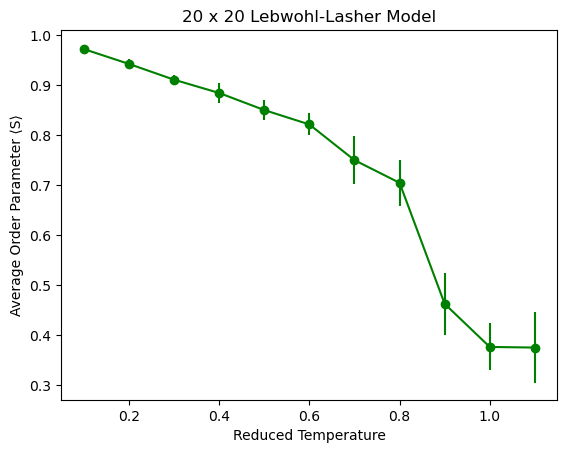

In [90]:
fig, ax = plt.subplots()

ax.errorbar(x=reduced_t, y=avg_S, yerr=std_S, marker='o', color='green')
ax.set_xlabel('Reduced Temperature')
ax.set_ylabel('Average Order Parameter ⟨S⟩')
ax.set_title('20 x 20 Lebwohl-Lasher Model')
plt.show()

Plotting baseline against numba accelerated version

In [95]:
# reading in numba accelerated version
numba = np.loadtxt('LL-Output-Fri-13-Feb-2026-at-03-49-08PM.txt')

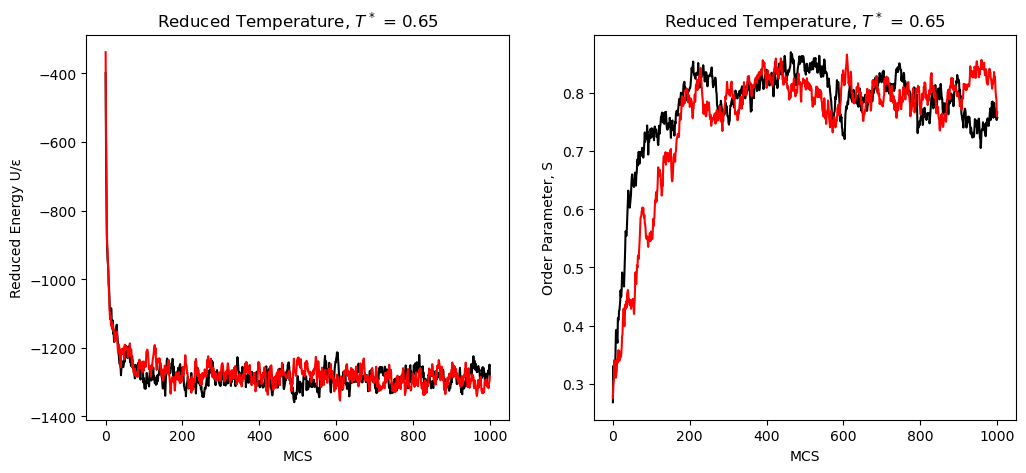

In [97]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(baseline_data[:,0], baseline_data[:,2], color='black')
ax[0].plot(numba[:,0], numba[:,2], color='red')


ax[0].set_xlabel('MCS')
ax[0].set_ylabel('Reduced Energy U/ε')
ax[0].set_title('Reduced Temperature, $T^*$ = 0.65')

ax[1].plot(baseline_data[:,0], baseline_data[:,3], color='black')
ax[1].plot(numba[:,0], numba[:,3], color='red')

ax[1].set_xlabel('MCS')
ax[1].set_ylabel('Order Parameter, S')
ax[1].set_title('Reduced Temperature, $T^*$ = 0.65')
plt.show()